![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hospitalizados_clean.csv")
df.head()

,Dias_hops_mq,Dias_post_biopsia,Fiebre,Hospitalizacion
0,2.0,1,1,1
1,5.0,1,1,1
2,4.0,1,1,1
3,5.0,1,1,1
4,4.0,1,1,1


Separen el dataset en X, y (variable objetivo)

In [21]:
def select_stratified_data(df, random_state=33):
    mask = df["Hospitalizacion"]==1 # mascara para hospitalizados
    # Datos de pacientes hospitalizados (en numpy)
    Z_hosp = df[mask].to_numpy()
    # Datos de pacientes no hospitalizados (en numpy)
    Z_no_hosp = df[~mask].to_numpy()

    # cantidad de pacientes hospitalizados y no hospitalizados
    n_hosp = df.loc[df["Hospitalizacion"]==1].shape[0]
    n_no_hosp = df.loc[df["Hospitalizacion"]==0].shape[0]
    n = df.shape[0]
    print("Cantidad total de datos --> ", n)
    print("Cantidad total de datos de la clase minoritaria (hospitalizados) --> ", n_hosp)
    print("Cantidad total de datos de la clase mayoritaria (no hospitalizados) --> ", n_no_hosp)

    # Genero 10 grupos de pacientes no hospitalizados, cada uno con la misma cantidad que los hospitalizados
    grupo = []

    for i in range(10):
        idx= np.arange(n_no_hosp)
        mask = idx[np.random.choice(idx, size=n_hosp, replace=False)]
        s1  = Z_no_hosp[mask]
        grupo.append(s1)
        
    grupo = np.array(grupo)
    return Z_hosp, grupo
Z_hosp, grupo = select_stratified_data(df)
print(Z_hosp.shape)
print(grupo.shape)

Cantidad total de datos -->  545
Cantidad total de datos de la clase minoritaria (hospitalizados) -->  24
Cantidad total de datos de la clase mayoritaria (no hospitalizados) -->  521
(24, 4)
(10, 24, 4)


---
### Obtenemos conjunto un conjunto de datos paraa entrenar

---

In [30]:
g = 0  # utilizo el primer grupo
y1 = Z_hosp[:,3] # Hospitalizados
y2 = grupo[g,:,3] # No hospitalizados

x1 = Z_hosp[:,0:3]
x2 = grupo[g,:,:3]

y = np.hstack([y1, y2])

X = np.vstack([x1, x2])



Separen el dataset en X_train, X_test, y_train y y_test

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [32]:
from sklearn.tree import DecisionTreeClassifier
# Creamos un modelo de arbol de decision
model = DecisionTreeClassifier(max_depth = None, random_state = 42) 
# max_depth =  es un hiperparámetro, profundidad arbol


# Entrenamos el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

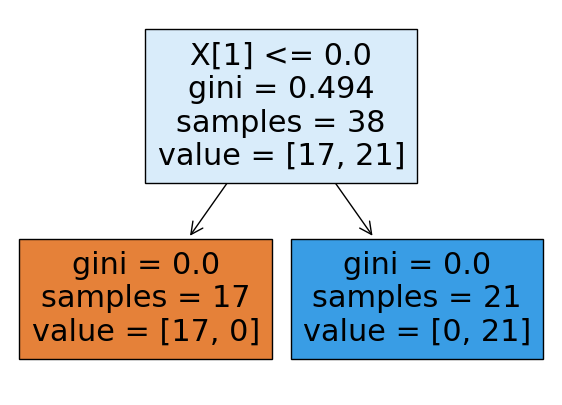

In [47]:
from sklearn import tree

plt.figure(figsize = (7,5))
tree.plot_tree(model, filled = True)
plt.show()

---
### Feature importance
---

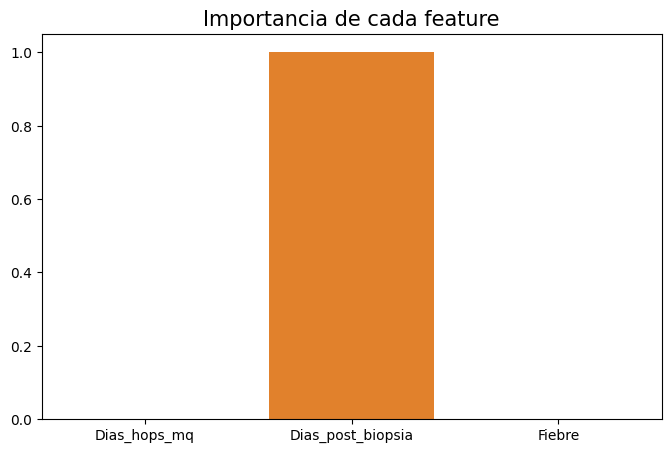

importances -->  [0. 1. 0.]


In [51]:
plt.figure(figsize = (8,5))

importances = model.feature_importances_
columns = list(df.columns)
columns.pop()
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 15)
plt.show()

print("importances --> ", importances)

---
### Predicciones

---

In [33]:
# Predicciones
from sklearn.metrics import accuracy_score
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)


print("accuracy (test)--> ",accuracy_score(y_test,y_pred_test))
print("accuracy (train)--> ",accuracy_score(y_train,y_pred_train))

accuracy (test)-->  1.0
accuracy (train)-->  1.0


---
### Matriz de confusion

---

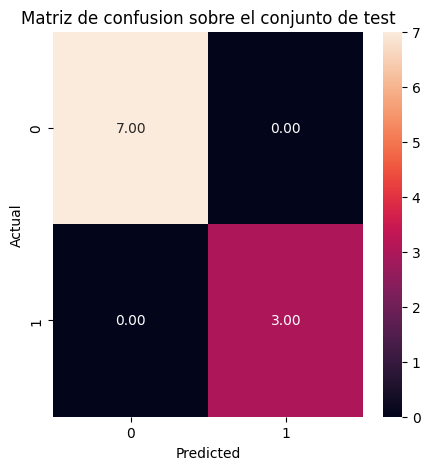

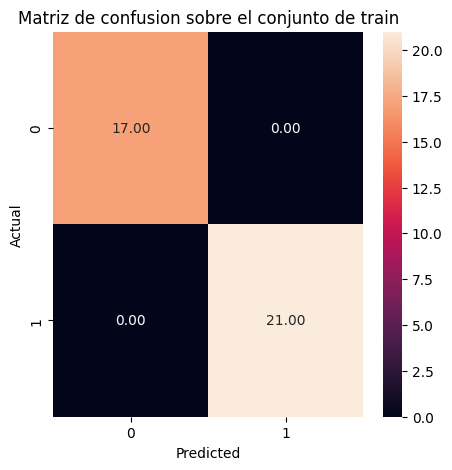

In [39]:
from sklearn.metrics import confusion_matrix



#Creamos las matrices de confusion
confusion_train = confusion_matrix(y_train, y_pred_train)
confusion_test = confusion_matrix(y_test, y_pred_test)

# cmn = 100*confusion_test.astype('float') / confusion_test.sum(axis=1)[:, np.newaxis]
cmn = confusion_test
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Matriz de confusion sobre el conjunto de test")
plt.show(block=False)

cmn = confusion_train
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Matriz de confusion sobre el conjunto de train")
plt.show(block=False)

---
### Metricas

---

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [45]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred_test, target_names=["No hosp","hosp"], output_dict=True)

cr

{'No hosp': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7},
 'hosp': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 10},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 10}}

---
Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

Preguntar --> solo tiene un nivel

---

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

Encuentre el valor óptimo para k

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

R/